In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from data import data_preprocess
from evaluation import metrics
from model import concrete_dropout, deep_ensemble

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('housing')

In [3]:
deep_ensemble_model = deep_ensemble.train_model(x_train, y_train, n_epoch = 1000, hidden_layers = [30, 30, 30], learning_rate = 0.005, exp_decay = .995)

initial loss:  786.88330078125
final loss:  2.9645960330963135
initial loss:  839.3842163085938
final loss:  2.85786771774292
initial loss:  912.3252563476562
final loss:  2.973076105117798
initial loss:  923.1369018554688
final loss:  2.8948800563812256
initial loss:  782.07861328125
final loss:  2.8833413124084473


Deep ensemble test MAPE:  0.1238312
Deep ensemble test RMSE:  3.7170732


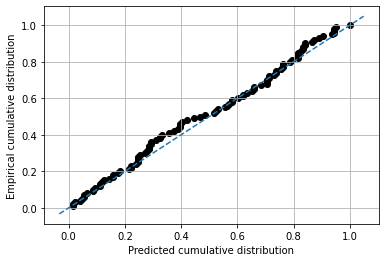

Deep ensemble test calibration error when step size is 0.001:  0.9400386747291518
Deep ensemble test calibration error when step size is 0.01:  0.09172713529856395
Deep ensemble test calibration error when step size is 0.1:  0.010531620055429592


In [4]:
mean_pred, var_pred = deep_ensemble_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()

print('Deep ensemble test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('Deep ensemble test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('Deep ensemble test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('Deep ensemble test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('Deep ensemble test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

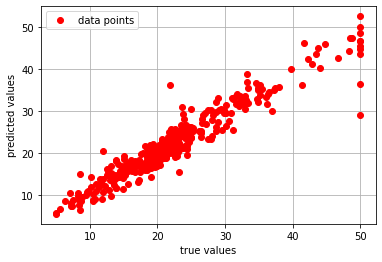

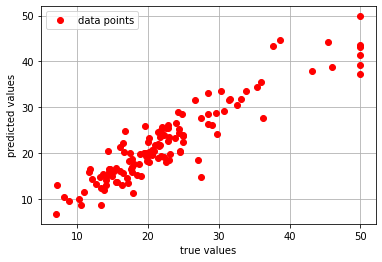

In [5]:
plt.plot(y_train.detach().numpy(), deep_ensemble_model(x_train)[0].detach().numpy().squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

plt.plot(y_test.detach().numpy(), mean_pred.squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

In [6]:
concrete_dropout_model = concrete_dropout.train_model(x_train, y_train, n_epoch = 500, n_features = 100, learning_rate = 0.003)

final loss:  0.6485853791236877


Concrete dropout test MAPE:  0.12130056
Concrete dropout test RMSE:  3.865527


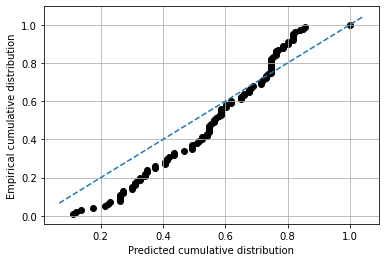

Concrete dropout test calibration error when step size is 0.001:  10.79034555303603
Concrete dropout test calibration error when step size is 0.01:  1.0620924666162763
Concrete dropout test calibration error when step size is 0.1:  0.08716301335348954


In [7]:
mean_pred, log_var_pred, _ = concrete_dropout_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = np.exp(log_var_pred.detach().numpy())

print('Concrete dropout test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('Concrete dropout test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('Concrete dropout test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('Concrete dropout test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('Concrete dropout test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

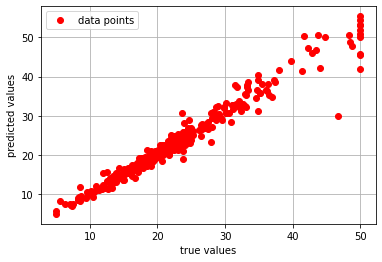

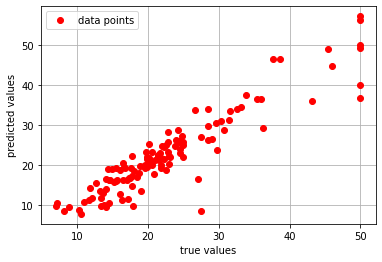

In [8]:
plt.plot(y_train.detach().numpy(), concrete_dropout_model(x_train)[0].detach().numpy().squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()

plt.plot(y_test.detach().numpy(), mean_pred.squeeze(1), 'or', label='data points')
plt.grid()
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.show()